In [1]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import gdown
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Data pre preprocessing 

In [4]:
# Google Drive file ID
file_id = "1x9EhE6q0RDynrcEU4cmY7L3R8_Qcf9gq" 
# Create the Google Drive download link
download_url = f"https://drive.google.com/uc?id={file_id}"
# Download the CSV file
output_path = "amazon_reviews.csv"
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1x9EhE6q0RDynrcEU4cmY7L3R8_Qcf9gq
From (redirected): https://drive.google.com/uc?id=1x9EhE6q0RDynrcEU4cmY7L3R8_Qcf9gq&confirm=t&uuid=f413d487-dc10-417b-89ce-54bcd216a08c
To: c:\Users\Andrea FS\OneDrive\Lambton college\second term\NLP\assignment1\amazon_reviews.csv
100%|██████████| 157M/157M [02:47<00:00, 938kB/s]  


'amazon_reviews.csv'

In [5]:
df = pd.read_csv(output_path)
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1580950175902,3,True
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,1604354586880,3,True
2,5.0,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1563966838905,0,True
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,1662258542725,7,True
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,1642722787262,0,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             494121 non-null  float64
 1   title              493996 non-null  object 
 2   text               493980 non-null  object 
 3   images             494121 non-null  object 
 4   asin               494121 non-null  object 
 5   parent_asin        494121 non-null  object 
 6   user_id            494121 non-null  object 
 7   timestamp          494121 non-null  int64  
 8   helpful_vote       494121 non-null  int64  
 9   verified_purchase  494121 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 34.4+ MB


In [7]:
# Check for missing values (nulls) in each column
null_values = df.isnull().sum()

# Display columns with null values and their counts
print(null_values[null_values > 0])

title    125
text     141
dtype: int64


In [8]:
# Percentage of missing values
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display columns with missing values and their percentage
print(null_percentage[null_percentage > 0])

title    0.025297
text     0.028536
dtype: float64


In [9]:
# Drop rows with missing text or title
df = df.dropna(subset=['title', 'text'])

In [10]:
total_null_values = df.isnull().sum().sum()
total_null_values

0

In [11]:
# Convert Unix Timestamp to Readable Date
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

In [12]:
# Drop irrelevant columns
df = df.drop(columns=['images', 'asin', 'parent_asin', 'user_id',])

# columns names
df.columns

Index(['rating', 'title', 'text', 'timestamp', 'helpful_vote',
       'verified_purchase', 'date'],
      dtype='object')

In [13]:
# Initialize stop words and lemmatizer
'''In sentiment analysis, where capturing the full meaning of a word is essential to accurately determine sentiment, 
lemmatization is generally a better choice. It ensures the processed words are meaningful and contribute positively 
to the model’s ability to detect sentiments accurately.'''
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the input is a valid string, return empty string if not
    if isinstance(text, str):
        text = text.lower()  # Lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stop words
        return ' '.join(tokens)
    else:
        return ''

# Apply the preprocessing to both 'title' and 'text'
df['clean_title'] = df['title'].apply(preprocess_text)
df['clean_text'] = df['text'].apply(preprocess_text)


In [14]:
# check null values
df.isnull().sum()

rating               0
title                0
text                 0
timestamp            0
helpful_vote         0
verified_purchase    0
date                 0
clean_title          0
clean_text           0
dtype: int64

In [15]:
# compare results from stemming
stemmer = PorterStemmer()
# Function for stemming
def stem_text(text):
    if isinstance(text, str):
        text = text.lower()  # Lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]  # Stem and remove stop words
        return ' '.join(tokens)
    else:
        return ''

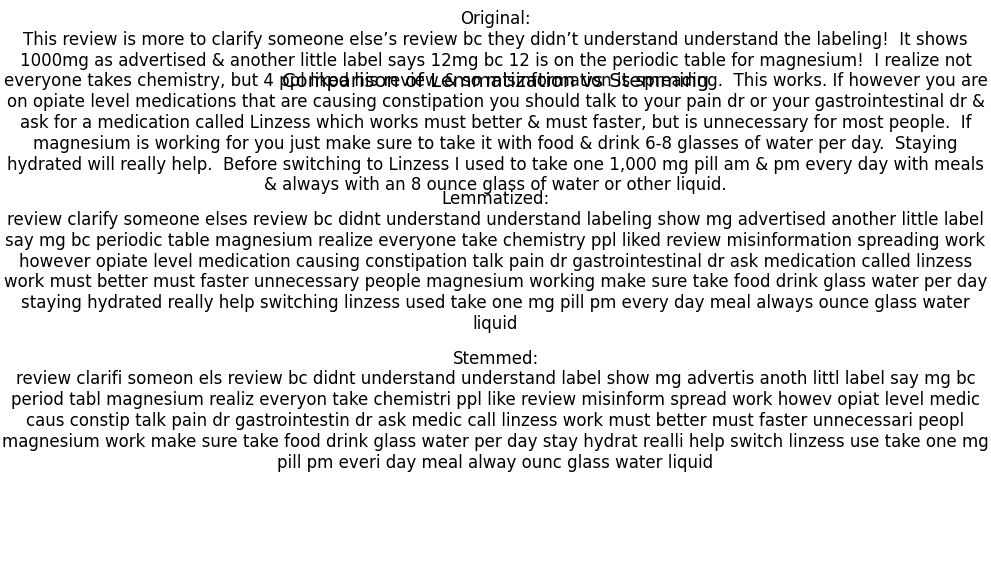

In [16]:
# Example text for comparison
example_text = df['text'].iloc[0] # First review text

# Preprocess the text with both methods
lemmatized_text = preprocess_text(example_text)
stemmed_text = stem_text(example_text)

# Plot the original, lemmatized, and stemmed text
fig, ax = plt.subplots(figsize=(10, 6))

# Original text
ax.text(0.5, 0.8, f"Original:\n{example_text}", fontsize=12, wrap=True, ha='center')
# Lemmatized text
ax.text(0.5, 0.5, f"Lemmatized:\n{lemmatized_text}", fontsize=12, wrap=True, ha='center')
# Stemmed text
ax.text(0.5, 0.2, f"Stemmed:\n{stemmed_text}", fontsize=12, wrap=True, ha='center')

# Remove axes and display plot
ax.axis('off')
plt.title('Comparison of Lemmatization vs Stemming', fontsize=14)
plt.show()

In [17]:
# Drop the original 'title' and 'text' columns after preprocessing
df = df.drop(columns=['title', 'text'])

In [18]:
#Sentiment Labeling
def label_sentiment(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating >= 2.0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(label_sentiment)

In [19]:
# export to clean_data.csv
df.to_csv('clean_data.csv', index=False)

In [20]:
# Google Drive file ID
file_id = "1wFCuWmi6B33Qttx-wKlDdt5ityRdkMH4"
# Create the Google Drive download link
download_url = f"https://drive.google.com/uc?id={file_id}"
# Download the CSV file
output_path = "amazon_reviews_clean.csv"
gdown.download(download_url, output_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1wFCuWmi6B33Qttx-wKlDdt5ityRdkMH4
To: c:\Users\Andrea FS\OneDrive\Lambton college\second term\NLP\assignment1\amazon_reviews_clean.csv
100%|██████████| 94.1M/94.1M [04:16<00:00, 367kB/s] 


'amazon_reviews_clean.csv'

### Exploratory Data Analysis (EDA)

In [21]:
df.head(5)

,rating,timestamp,helpful_vote,verified_purchase,date,clean_title,clean_text,sentiment
0,4.0,1580950175902,3,True,2020-02-06 00:49:35.902,mg periodic table people mg magnesium,review clarify someone elses review bc didnt u...,positive
1,5.0,1604354586880,3,True,2020-11-02 22:03:06.880,save lanet using less plastic,love easy multitasking bleach tablet beat carr...,positive
2,5.0,1563966838905,0,True,2019-07-24 11:13:58.905,fantastic,suffering couple month heel pain plantar fasci...,positive
3,4.0,1662258542725,7,True,2022-09-04 02:29:02.725,hold water make bubble thats bought,cheap wanted massage function joke though come...,positive
4,1.0,1642722787262,0,True,2022-01-20 23:53:07.262,,didnt thing saying dont,negative


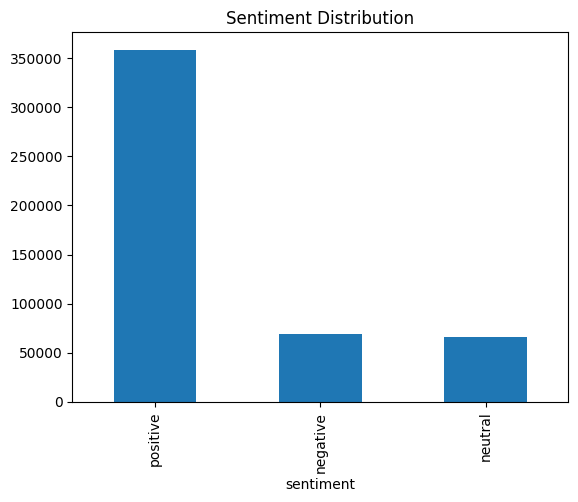

In [22]:
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

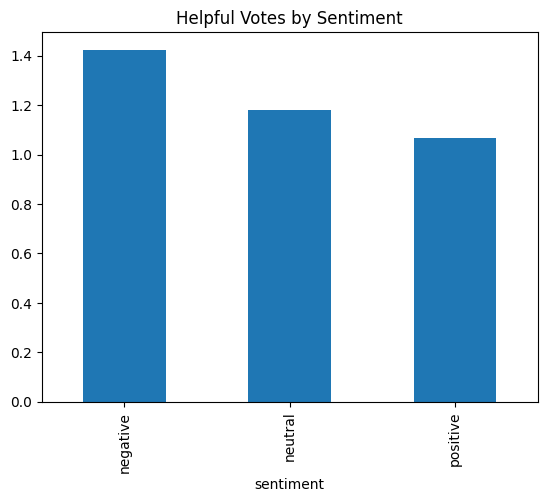

In [23]:
# Analyze if helpful votes have any correlation with positive or negative reviews.
df.groupby('sentiment')['helpful_vote'].mean().plot(kind='bar', title='Helpful Votes by Sentiment')
plt.show()

In [24]:
df[['rating', 'helpful_vote']].corr()

,rating,helpful_vote
rating,1.000000,-0.007774
helpful_vote,-0.007774,1.000000


In [25]:
# no correlation between rating and helpful votes drop the column helpful votes
df = df.drop(columns=['helpful_vote'])


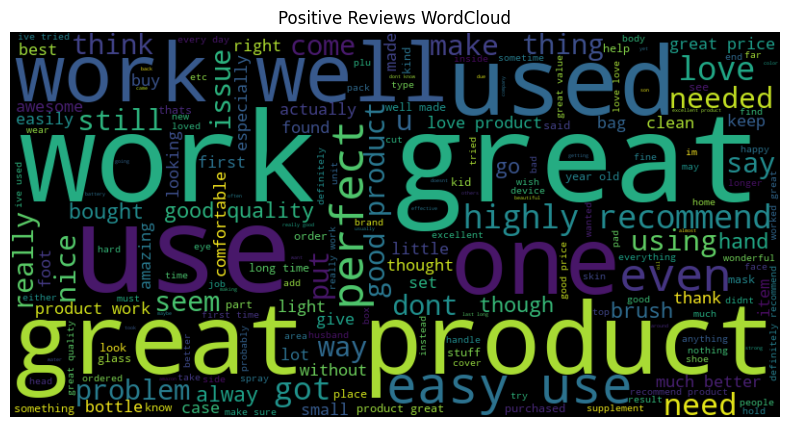

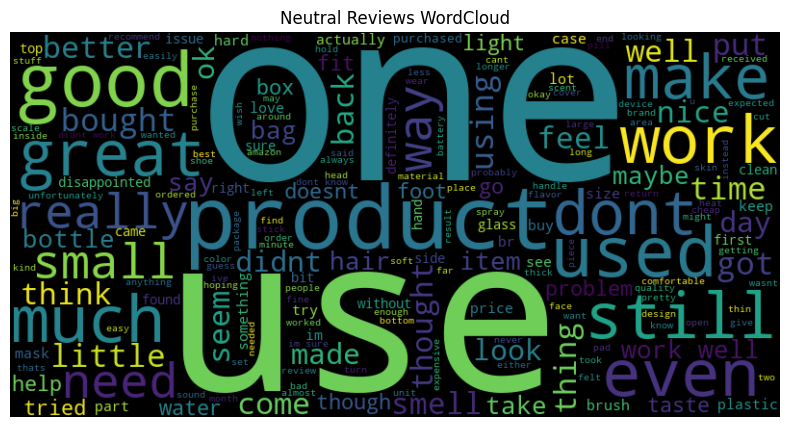

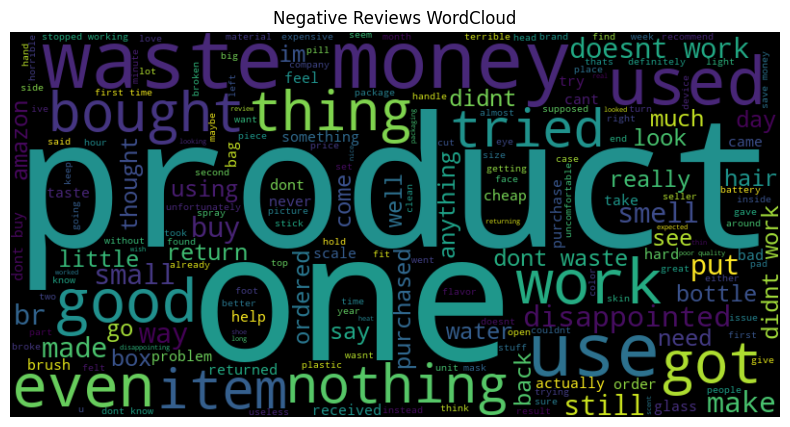

In [26]:
# Visualize common words in positive, neutral, and negative reviews using word clouds.


# Word cloud for positive reviews
positive_text = ' '.join(df[df['sentiment'] == 'positive']['clean_text'])
wordcloud_positive = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud')
plt.show()

# Word cloud for neutral reviews
neutral_text = ' '.join(df[df['sentiment'] == 'neutral']['clean_text'])
wordcloud_neutral = WordCloud(width=800, height=400).generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews WordCloud')
plt.show()

# Word cloud for negative reviews
negative_text = ' '.join(df[df['sentiment'] == 'negative']['clean_text'])
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.show()

# Vectorizers

## Count Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Applying CountVectorizer method
vectorizer = CountVectorizer(max_features=10000, max_df=0.95, min_df=2, stop_words='english')  # Limit to 10,000 most frequent words


# Fit and transform the clean_text column to create the Bag of words model
bag_of_words = vectorizer.fit_transform(df['clean_text'])

# Getting the word feature names
words = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array
#dense_matrix = bag_of_words.toarray()

# Create a DataFrame with words as columns and documents as rows
bow_df = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=words)

# Display the Bag of Words DataFrame
print(bow_df.head())  

   aa  aaa  ab  abdomen  abdominal  ability  able  abnormal  aboutbr  abr  \
0   0    0   0        0          0        0     0         0        0    0   
1   0    0   0        0          0        0     0         0        0    0   
2   0    0   0        0          0        0     0         0        0    0   
3   0    0   0        0          0        0     0         0        0    0   
4   0    0   0        0          0        0     0         0        0    0   

   ...  ziploc  ziplock  zipped  zipper  zippered  zippo  zit  zombie  zone  \
0  ...       0        0       0       0         0      0    0       0     0   
1  ...       0        0       0       0         0      0    0       0     0   
2  ...       0        0       0       0         0      0    0       0     0   
3  ...       0        0       0       0         0      0    0       0     0   
4  ...       0        0       0       0         0      0    0       0     0   

   zoom  
0     0  
1     0  
2     0  
3     0  
4     0  

[

## TF-IDF

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the 'clean_text' column
bow_vectorizer = TfidfVectorizer(max_features=10000)  
tfidf = bow_vectorizer.fit_transform(df['clean_text'].fillna(''))  # Fill NaN with empty strings to avoid errors

# Get the words (features) from the vectorizer
words_tfidf = bow_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to an array
#tfidf_array = tfidf.toarray()

# Create a DataFrame to visualize the TF-IDF scores for each document
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf, columns=words_tfidf)

# Display the first few rows of the TF-IDF matrix
tfidf_df.head()

,aa,aaa,ab,abdomen,abdominal,ability,able,abnormal,aboutbr,abr,...,ziploc,ziplock,zipped,zipper,zippered,zippo,zit,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Classification

In [32]:
df['sentiment'].value_counts()

sentiment
positive    358528
negative     69542
neutral      65831
Name: count, dtype: int64

## Logistic regression

### Using Bag of Words

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Step 2: Splitting the data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_df, df['sentiment'], test_size=0.2, random_state=42)

# Step 3: Training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow, y_train)

# Step 4: Making predictions
y_pred = model.predict(X_test_bow)

# Step 5: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.58      0.63     13996
     neutral       0.49      0.24      0.33     13221
    positive       0.85      0.96      0.90     71564

    accuracy                           0.81     98781
   macro avg       0.67      0.59      0.62     98781
weighted avg       0.78      0.81      0.79     98781



In [79]:
# Function to predict sentiment for new reviews
def predict_sentiment_BoW_LR(review_text):
    # Transform the new review using the same vectorizer
    review_bow = bow_vectorizer.transform([review_text])
    # Predict the sentiment using the trained model
    prediction = model.predict(review_bow)
    # Print the predicted sentiment
    print("Predicted sentiment for the new review:", prediction)
    
# Example usage
new_review = "The product works great and exceeded my expectations."
predicted_sentiment = predict_sentiment_BoW_LR(new_review)

Predicted sentiment for the new review: ['positive']


c:\Users\Andrea FS\OneDrive\Lambton college\second term\NLP\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
new_review =  "It was okay. Not what I was expecting though."
predicted_sentiment = predict_sentiment_BoW_LR(new_review)

Predicted sentiment for the new review: ['negative']


In [70]:
new_review = "I hate that product. Please don't buy it"
predicted_sentiment = predict_sentiment_BoW_LR(new_review)

Predicted sentiment for the new review: ['positive']


### Using TF-IDF 

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(df['clean_text'].fillna(''), df['sentiment'], test_size=0.2, random_state=42)

# Fit the vectorizer on the training data
vectorizer_tfidf = TfidfVectorizer(max_features=10000)
X_train = vectorizer_tfidf.fit_transform(X_train_tfidf)

# Transform the test data using the fitted vectorizer
X_test = vectorizer_tfidf.transform(X_test_tfidf)

# Training the Logistic Regression model
model_tfidf = LogisticRegression(max_iter=200, solver='saga')  # Using 'saga' for large datasets
model_tfidf.fit(X_train, y_train)

# Making predictions
y_pred_tfidf = model_tfidf.predict(X_test)

# Evaluating the model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf, target_names=['negative', 'neutral', 'positive'])

print(f"Accuracy: {accuracy_tfidf:.2f}")
print("Classification Report:")
print(report_tfidf)


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.63      0.66     13996
     neutral       0.52      0.28      0.36     13221
    positive       0.87      0.96      0.91     71564

    accuracy                           0.82     98781
   macro avg       0.69      0.62      0.65     98781
weighted avg       0.80      0.82      0.80     98781



In [66]:
# Example text to classify
new_text = ["This product is amazing and I love using it every day!"]

def predict_sentiment_tfidf_LR(new_text):
    # Preprocess the text
    preprocessed_text = preprocess_text(new_text[0])

    # Transform the preprocessed text using the fitted vectorizer
    tfidf = vectorizer_tfidf.transform([preprocessed_text])

    # Make a prediction using the trained model
    predicted_label = model_tfidf.predict(tfidf)

    # Display the predicted sentiment
    predicted_sentiment = predicted_label[0]
    print(f"The predicted sentiment for the given text is: {predicted_sentiment}")

predict_sentiment_tfidf_LR(new_text)


The predicted sentiment for the given text is: positive


In [52]:
new_text = ["I hate that product. Please don't buy it"]
predict_sentiment_tfidf_LR(new_text)

The predicted sentiment for the given text is: negative


In [56]:
new_text = ["It was okay. Not what I was expecting though."]
predict_sentiment_tfidf_LR(new_text)

The predicted sentiment for the given text is: neutral


## Random Forest Classifier

### Using Bag of Words

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest classifier for Bag of Words
rf_bow = RandomForestClassifier(n_estimators=5, random_state=42)
rf_bow.fit(X_train_bow, y_train)

# Predictions for Bag of Words
y_pred_bow = rf_bow.predict(X_test_bow)
print("Bag of Words - Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("Classification Report:\n", classification_report(y_test, y_pred_bow))


Bag of Words - Random Forest
Accuracy: 0.7692774926352234
Classification Report:
               precision    recall  f1-score   support

    negative       0.54      0.57      0.55     13996
     neutral       0.37      0.24      0.29     13221
    positive       0.86      0.91      0.88     71564

    accuracy                           0.77     98781
   macro avg       0.59      0.57      0.58     98781
weighted avg       0.75      0.77      0.76     98781



In [83]:
# Function to predict sentiment for new reviews
def predict_sentiment_BoW_RF(review_text):
    # Transform the new review using the same vectorizer
    review_bow = bow_vectorizer.transform([review_text])
    # Predict the sentiment using the trained model
    prediction = rf_bow.predict(review_bow)
    # Print the predicted sentiment
    print("Predicted sentiment for the new review:", prediction)
    
# Example usage
new_review = "The product works great and exceeded my expectations."
predicted_sentiment = predict_sentiment_BoW_RF(new_review)

Predicted sentiment for the new review: ['positive']


c:\Users\Andrea FS\OneDrive\Lambton college\second term\NLP\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [85]:
new_text = "I hate that product. Please don't buy it"
predict_sentiment_BoW_RF(new_text)
new_text = "It was okay. Not what I was expecting though."
predict_sentiment_BoW_RF(new_text)


Predicted sentiment for the new review: ['positive']
Predicted sentiment for the new review: ['neutral']


In [88]:
# Fit the vectorizer on the training data
vectorizer_tfidf = TfidfVectorizer(max_features=10000)
X_train = vectorizer_tfidf.fit_transform(X_train_tfidf)

# Transform the test data using the fitted vectorizer
X_test = vectorizer_tfidf.transform(X_test_tfidf)
# Training the Random Forest classifier for TF-IDF
rf_tfidf = RandomForestClassifier(n_estimators=5, random_state=42)
rf_tfidf.fit(X_train, y_train)

# Predictions for TF-IDF
y_pred_tfidf = rf_tfidf.predict(X_test)
print("TF-IDF - Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))


TF-IDF - Random Forest
Accuracy: 0.7833793948228911
Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.57      0.57     13996
     neutral       0.41      0.21      0.28     13221
    positive       0.85      0.93      0.89     71564

    accuracy                           0.78     98781
   macro avg       0.61      0.57      0.58     98781
weighted avg       0.75      0.78      0.76     98781



In [89]:

# Example text to classify
new_text = ["This product is amazing and I love using it every day!"]

def predict_sentiment_tfidf_RF(new_text):
    # Preprocess the text
    preprocessed_text = preprocess_text(new_text[0])

    # Transform the preprocessed text using the fitted vectorizer
    tfidf = vectorizer_tfidf.transform([preprocessed_text])

    # Make a prediction using the trained model
    predicted_label = rf_tfidf.predict(tfidf)

    # Display the predicted sentiment
    predicted_sentiment = predicted_label[0]
    print(f"The predicted sentiment for the given text is: {predicted_sentiment}")

predict_sentiment_tfidf_RF(new_text)



The predicted sentiment for the given text is: positive


In [90]:
new_text = ["I hate that product. Please don't buy it"]
predict_sentiment_tfidf_RF(new_text)

The predicted sentiment for the given text is: negative


In [91]:
new_text = ["It was okay. Not what I was expecting though."]
predict_sentiment_tfidf_RF(new_text)


The predicted sentiment for the given text is: neutral
